## Project Part 3 (a.k.a. Project 3 on Schedule)
For project 3, I would like you to continue working on your project 2 line of investigation OR pivot to something different depending on your results or understanding or feedback on project 2. I will work to review project 2 submissions this week, so I can provide more individualized feedback as well as extract some highlights.

### Guidance (i.e., what you should do)
We've said many times. This project isn't about everyone reaching the same point in a predetermined set of steps. It's about applying what we are learning in class to produce real data analysis for the community. It is about as *Learn by doing* as you could possibly get at Cal Poly. So what should you be doing this week for the project? Here is some guidance (but remember this is only to guide you and not box you into specific tasks). They are in no particular order. 
* Consider what questions we want to ask from our evolutionary tree analysis. Think about what questions the book was trying to answer. Do we even have the data in this notebook to answer some of those questions? If not, spend time trying to find it now that you can know more about what to look for in terms of format. Do some literature searching and see what other work has been done for this virus and others.
* Research and try different evolutionary tree programs/frameworks. What I've done below is not the only game in town by far. Biopython itself has different options.
* Consider the alignment itself. Are there different ways to do this? Did we do it correctly?
* What about the sequences themselves? Are they all of the same quality? Should we exclude some?
* What about the virus alignment program? Did we use that correctly? Should we have done the entire sequence instead of using Spike as a reference? Should we try a different reference. 
* Do we have more data available about the sequences? Part of world, etc. Can we do some digging here to answer different questions.
* And I'm sure you can think of more to attempt... Think about what you want to do. Spend time working towards a well thoughtout goal. Document things as you go. Talk to everyone on Slack. Together we can do this!

### Link to clone the repository
Here is a link to the project repository.

https://github.com/anderson-github-classroom/csc-448-project

The website can be viewed at https://anderson-github-classroom.github.io/csc-448-project/.

### First step is to get the data
We are going to rely on the Galaxy team to pull together our sequence data for now. We might change this later.

In [1]:
#import wget

#url = 'https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta'
#file = 'current_complete_ncov_genomes.fasta'
#wget.download(url, file)

### Virus Alignment
We will use a program specific for viral multiple alignments: https://github.com/rega-cev/virulign-tutorial

https://academic.oup.com/bioinformatics/article/35/10/1763/5123354

I downloaded the Mac binary and put it /Users/panderson/

In [2]:
#!/Users/richagadgil/Desktop/CSC448/csc-448-project/students/rgadgil

I also downloaded the tutorials and the program repository.

In [3]:
#!git clone https://github.com/rega-cev/virulign-tutorial 

In [4]:
#!git clone https://github.com/rega-cev/virulign 

### Before alignment
As we mentioned in class, we need an alignment so we can derive our pairwise distance scores so we can then put together our distance matrix.

This package contains a reference Spike protein that can be provided as an argument when performing alignment. This code took my computer a few minutes to run, so I've included the output in the project repository: csc-448-project/data/position_table.csv.

In [5]:
#!virulign-1/references/SARS-CoV-2/S.xml current_complete_ncov_genomes.fasta --exportAlphabet Nucleotides --exportKind PositionTable > position_table.csv

In [6]:
#!virulign virulign-1/references/SARS-CoV-2/S.xml sequences.fasta --exportAlphabet Nucleotides --exportKind PositionTable > metadata_table.csv

### Read the data into a pandas dataframe

In [7]:
import pandas as pd
position_table = pd.read_csv('../../data/position_table.csv') # or put in the path to csc-448-project/data/position_table.csv

In [8]:
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


In [17]:
from Bio import Phylo
from Bio.Phylo.Consensus import *
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

def print_trees(country, position_table):
    ### Pull out the concensus sequence

    concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
    concensus_seq

    position_table = position_table.set_index('seqid')

    ### Determine which samples are farthest from the concensus sequence

    distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
    distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
    distance_from_concensus_seq_sorted

    ### Select 10 sequences to do our first analysis

    subset_seqs = distance_from_concensus_seq_sorted[:10].index
    subset_seqs

    ### Construct a distance matrix for our sequences

    distances = {}
    for i,seqid1 in enumerate(subset_seqs):
        distances[seqid1,seqid1]=0
        for j in range(i+1,len(subset_seqs)):
            seqid2 = subset_seqs[j]
            distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
            distances[seqid2,seqid1] = distances[seqid1,seqid2]
    distances = pd.Series(distances).unstack()
 
    matrix = np.tril(distances.values).tolist()
    for i in range(len(matrix)):
        matrix[i] = matrix[i][:i+1]
    dm = DistanceMatrix(list(distances.index), matrix)

    ### Now construct our tree
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    print(country.upper())
    print("Neighbor Joining Tree")
    tree.ladderize()   # Flip branches so deeper clades are displayed at top
    display(Phylo.draw(tree))
    #**Please see the guidance at the top of the page for what to try**

    if(len(dm) > 1):
        tree2 = constructor.upgma(dm)
        #Construction of a distance tree using clustering with the Unweighted Pair Group Method with Arithmatic Mean (UPGMA) -- stepwise differences
        print("UPGMA Tree")
        tree2.ladderize()   # Flip branches so deeper clades are displayed at top
        display(Phylo.draw(tree2))
    return


    # Other experimental Trees
    #trees = [tree, tree2]
    #target_tree = trees[0]
    #support_tree = get_support(target_tree, trees)

    #Phylo.draw(support_tree)

    #strict_tree = strict_consensus(trees)
    #majority_tree = majority_consensus(trees, 0.5)
    #adam_tree = adam_consensus(trees)

    #Phylo.draw(strict_tree)

    #Phylo.draw(majority_tree)

    #Phylo.draw(adam_tree)


BRAZIL
Neighbor Joining Tree


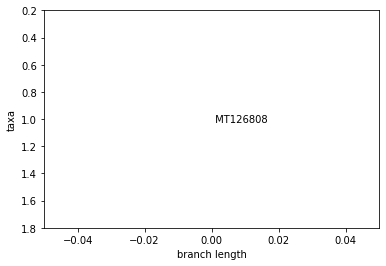

None

TAIWAN
Neighbor Joining Tree


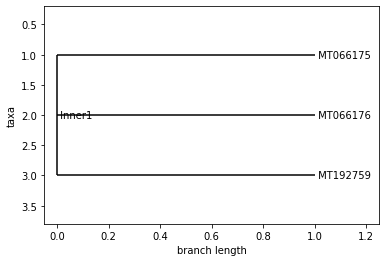

None

UPGMA Tree


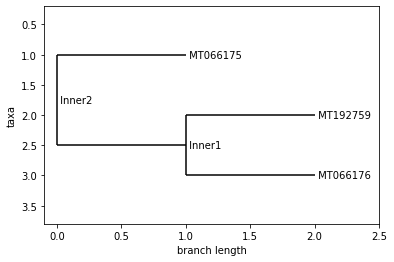

None

VIET NAM
Neighbor Joining Tree


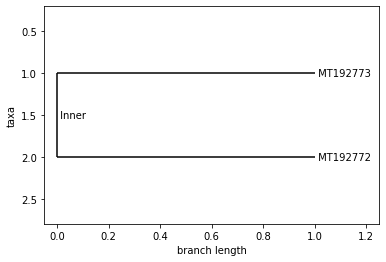

None

UPGMA Tree


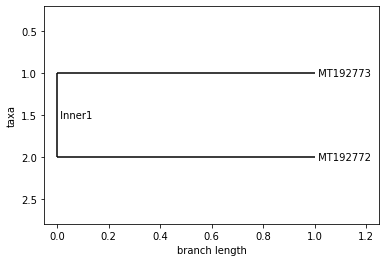

None

TURKEY
Neighbor Joining Tree


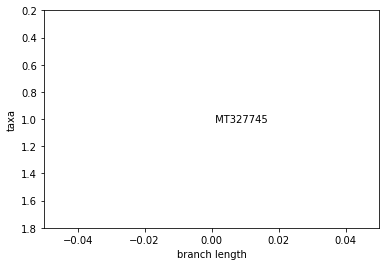

None

GREECE
Neighbor Joining Tree


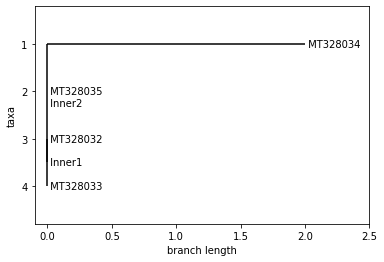

None

UPGMA Tree


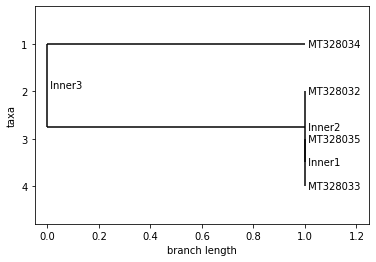

None

AUSTRALIA
Neighbor Joining Tree


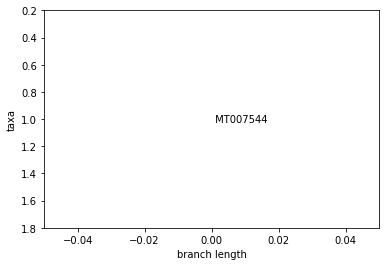

None

SOUTH KOREA
Neighbor Joining Tree


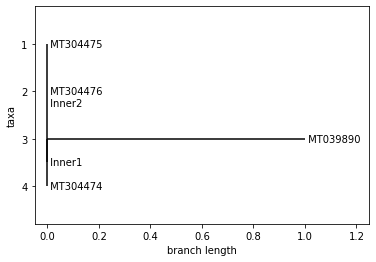

None

UPGMA Tree


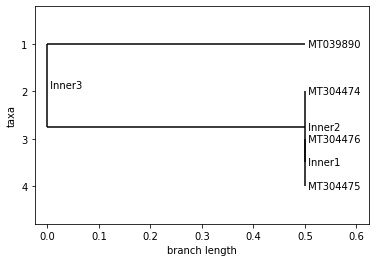

None

NAN
Neighbor Joining Tree


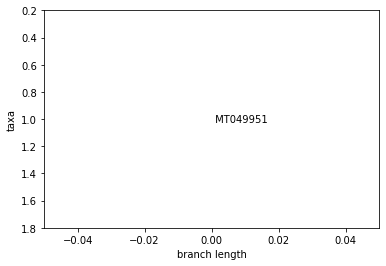

None

SOUTH AFRICA
Neighbor Joining Tree


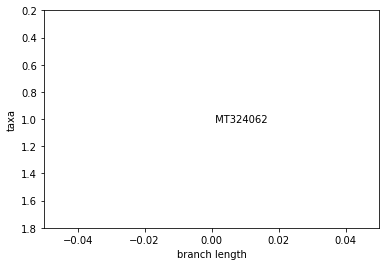

None

USA
Neighbor Joining Tree


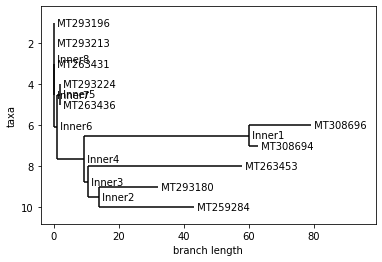

None

UPGMA Tree


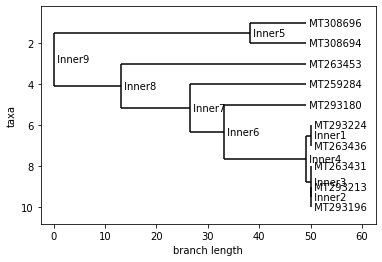

None

SWEDEN
Neighbor Joining Tree


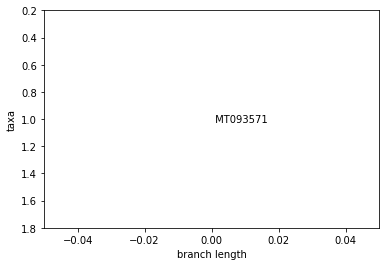

None

NEPAL
Neighbor Joining Tree


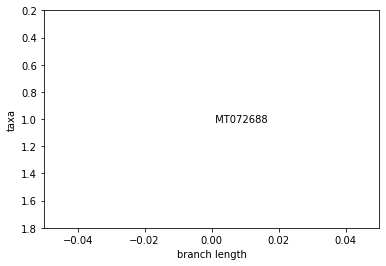

None

ISRAEL
Neighbor Joining Tree


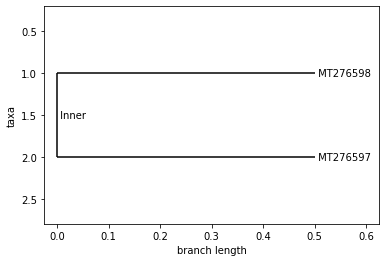

None

UPGMA Tree


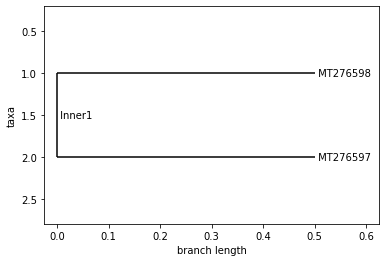

None

SPAIN
Neighbor Joining Tree


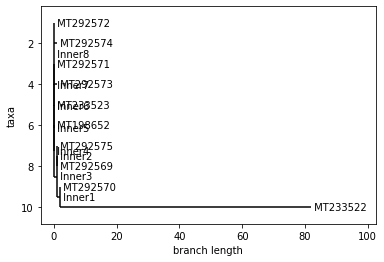

None

UPGMA Tree


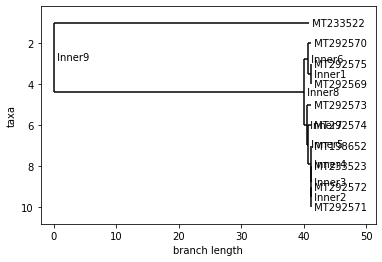

None

ITALY
Neighbor Joining Tree


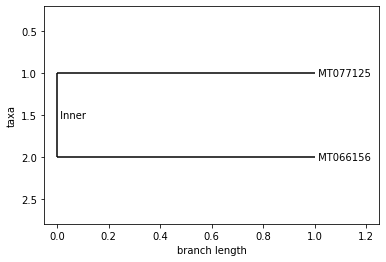

None

UPGMA Tree


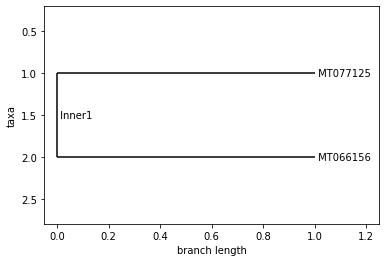

None

FRANCE
Neighbor Joining Tree


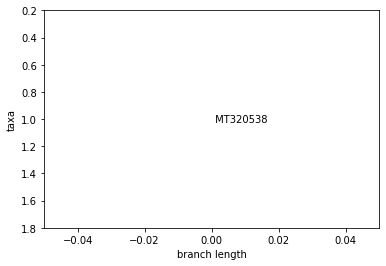

None

IRAN
Neighbor Joining Tree


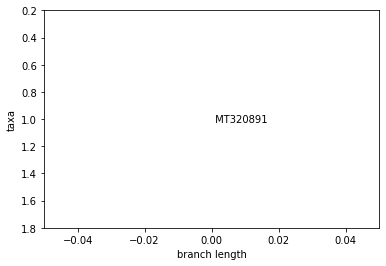

None

CHINA
Neighbor Joining Tree


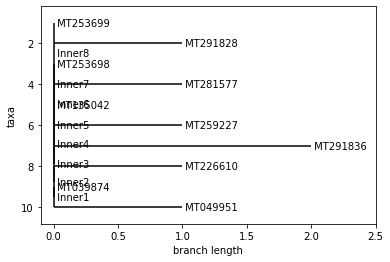

None

UPGMA Tree


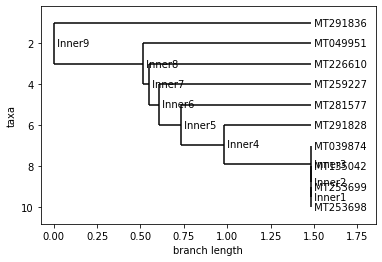

None

PERU
Neighbor Joining Tree


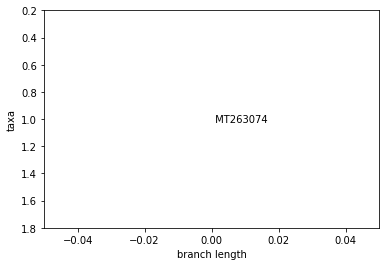

None

INDIA
Neighbor Joining Tree


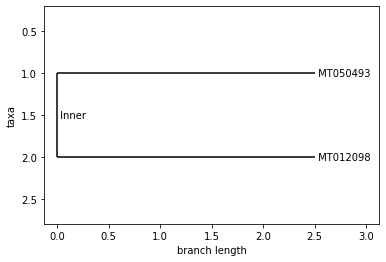

None

UPGMA Tree


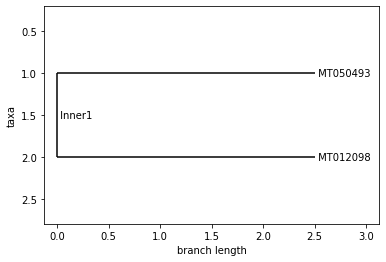

None

PAKISTAN
Neighbor Joining Tree


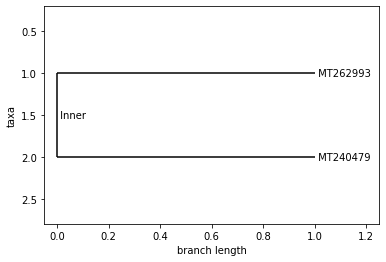

None

UPGMA Tree


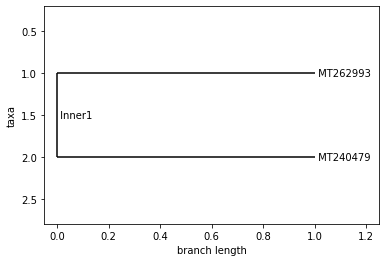

None

In [18]:
# Print Phylogenic Trees per Country
new_pos_table = position_table
new_pos_table['seqid'] = new_pos_table['seqid'].apply(lambda x: x.split(".")[0]).dropna()

metadata_df = pd.read_csv('sequences.csv')
countries = set([str(i).split(":")[0] for i in metadata_df['Geo_Location'].values])

for country in countries:
    country_accessions = metadata_df[metadata_df['Geo_Location'].str.contains(country, na=False)]
    new_table = new_pos_table[new_pos_table['seqid'].isin(country_accessions['Accession'].values)]
    if(len(new_table) > 0):
        print_trees(country, new_table)


2020-01
Neighbor Joining Tree


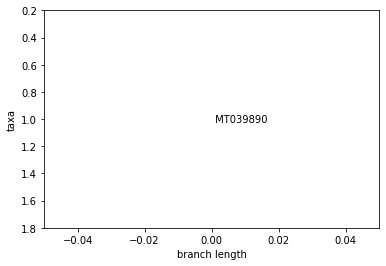

None

2020-02
Neighbor Joining Tree


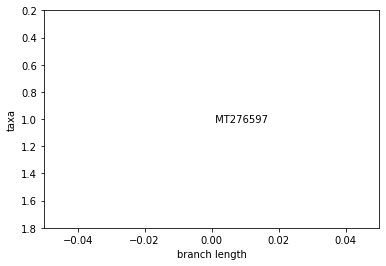

None

2020-03
Neighbor Joining Tree


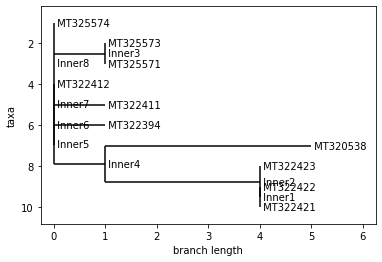

None

UPGMA Tree


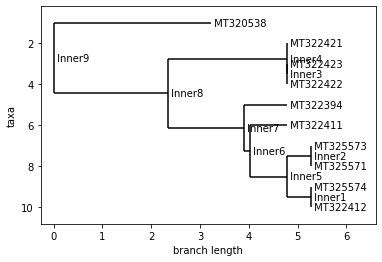

None

2020-04
Neighbor Joining Tree


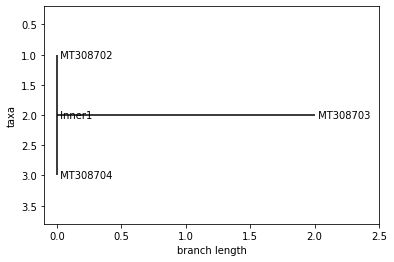

None

UPGMA Tree


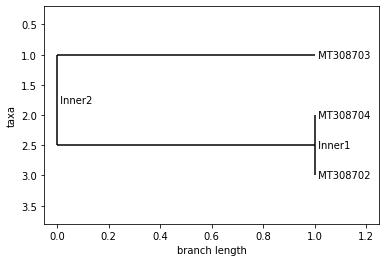

None

In [19]:
metadata_df = pd.read_csv('sequences.csv')

collection_dates = list(set([i for i in metadata_df['Collection_Date'].values]))
collection_dates.remove(np.nan)
collection_dates = list(set([i.split("-")[0]+"-"+i.split("-")[1] for i in collection_dates if len(i.split("-")) == 3]))
collection_dates.sort()


for date in collection_dates:
    curr_date = metadata_df[metadata_df['Collection_Date'] == date]
    new_table = new_pos_table[new_pos_table['seqid'].isin(curr_date['Accession'].values)]
    if(len(new_table) > 0):
        print_trees(date, new_table)

In [ ]:
# TO DO: Add time series data 